# 1 Introducción




En este cuaderno se desarrollo un algoritmo que cuenta objetos de una imagen cuyo contorno esta cerrado. Pasando por las diferentes etapas que se necesitan para realizar la tarea. El algoritmo se implemento utilizando la biblioteca openCV.

---
# 2 Armado del ambiente
Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno Colab.

In [ ]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://promocionalesmg.com/wp-content/uploads/2020/05/PELOTAS-PROMOCIONALES-ANTIESTRESS-LISAS-SOC013X-600x600.jpg" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://programarfacil.com/wp-content/uploads/2017/04/monedas.jpg -O imagen.jpg

# TODO: Mejorar información y resultado de ejecución. 
!wget {url_imagen} -O imagen.jpg

--2021-11-21 22:39:51--  https://promocionalesmg.com/wp-content/uploads/2020/05/PELOTAS-PROMOCIONALES-ANTIESTRESS-LISAS-SOC013X-600x600.jpg
Resolving promocionalesmg.com (promocionalesmg.com)... 162.241.60.249
Connecting to promocionalesmg.com (promocionalesmg.com)|162.241.60.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23100 (23K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>]  22.56K  --.-KB/s    in 0.04s   

2021-11-21 22:39:51 (624 KB/s) - ‘imagen.jpg’ saved [23100/23100]



---
## 2.2 Instala openCV

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

# 3 Desarrollo

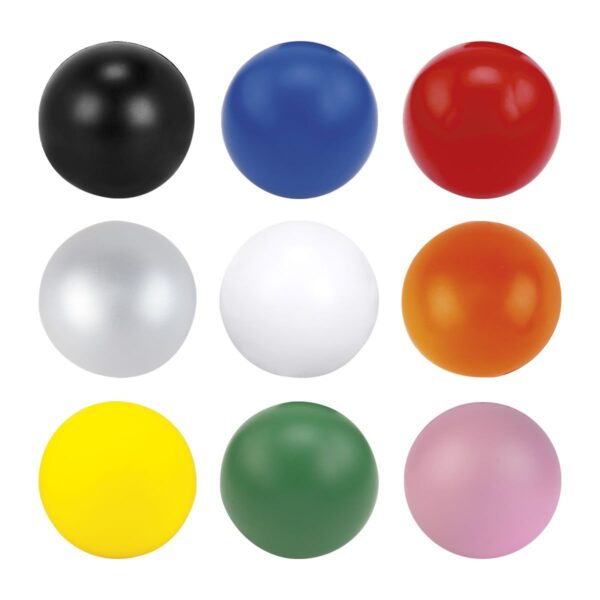

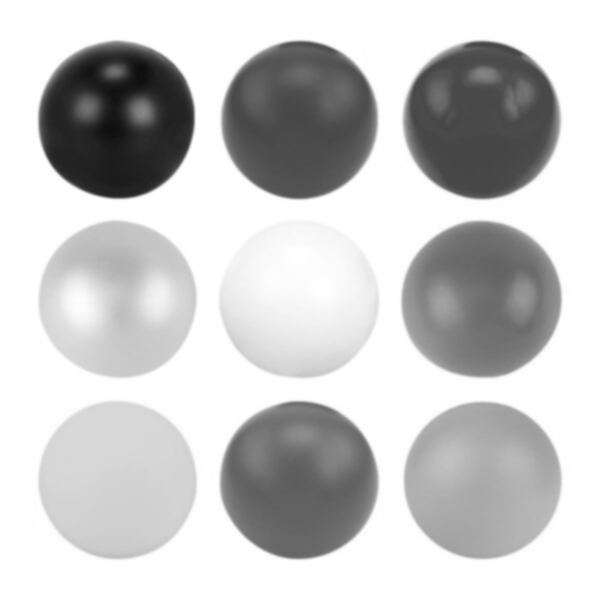

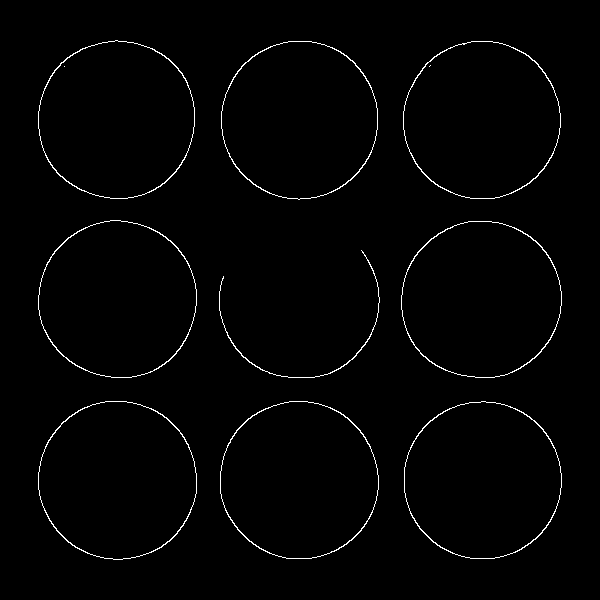

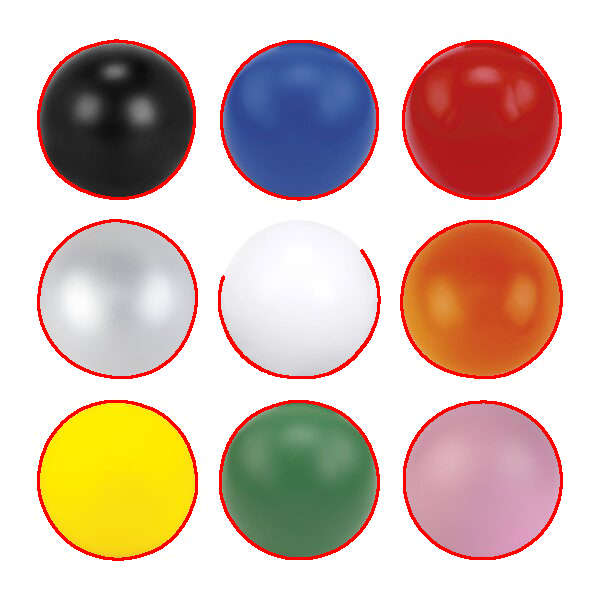

He encontrado 9 objetos


In [ ]:
from datetime import datetime
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

tiempo_total = datetime.now()

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

 
# Cargamos la imagen
try:
  original = cv2.imread("/content/imagen.jpg")
  cv2_imshow(original)
except:
  print("No se encontro la imagen para procesar")
else:
  

  tiempo_img = datetime.now()

  # Convertimos a escala de grises
  gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  
  tiempo_img_GRIS = datetime.now() - tiempo_img

  # Aplicar suavizado Gaussiano
  gauss = cv2.GaussianBlur(gris, (5,5), 0)
  
  tiempo_img_sua = datetime.now() - tiempo_img

  cv2_imshow(gauss)
  
  # Detectamos los bordes con Canny
  canny = cv2.Canny(gauss, 50, 150)
  
  tiempo_img_canny = datetime.now() - tiempo_img

  cv2_imshow(canny)
  
  # Buscamos los contornos
  (contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  tiempo_img_contornos = datetime.now() - tiempo_img
    
  cv2.drawContours(original,contornos,-1,(0,0,255), 2)
  cv2_imshow(original)
  
  cv2.waitKey(0)

  # Mostramos el número de monedas por consola
  print("He encontrado {} objetos".format(len(contornos)))

  tiempo_img_total = datetime.now() - tiempo_img


# 4 Metricas




In [ ]:
print(" Tiempo hasta grisado en MS:", tiempo_en_ms( tiempo_img_GRIS ), "[ms]" )
print(" Tiempo de grisado en MS:", tiempo_en_ms( tiempo_img_GRIS ), "[ms]" )
print("     Tiempo hasta suavizado en MS:", tiempo_en_ms( tiempo_img_sua ) , "[ms]" )
print("     Tiempo de suavizado en MS:", tiempo_en_ms( tiempo_img_sua - tiempo_img_GRIS  ) , "[ms]" )
print("         Tiempo hasta deteccion bordes en MS:", tiempo_en_ms( tiempo_img_canny ), "[ms]" )
print("         Tiempo de deteccion bordes en MS:", tiempo_en_ms( tiempo_img_canny - tiempo_img_sua), "[ms]" )
print("             Tiempo hasta deteccion contornos en MS:", tiempo_en_ms( tiempo_img_contornos ), "[ms]" )
print("             Tiempo de deteccion contornos en MS:", tiempo_en_ms( tiempo_img_contornos - tiempo_img_canny), "[ms]" )
print(" Tiempo total de procesado de imagen en MS:", tiempo_en_ms( tiempo_img_total ), "[ms]" )

 Tiempo hasta grisado en MS: 2.105 [ms]
 Tiempo de grisado en MS: 2.105 [ms]
     Tiempo hasta suavizado en MS: 7.639 [ms]
     Tiempo de suavizado en MS: 5.534 [ms]
         Tiempo hasta deteccion bordes en MS: 79.926 [ms]
         Tiempo de deteccion bordes en MS: 72.287 [ms]
             Tiempo hasta deteccion contornos en MS: 104.981 [ms]
             Tiempo de deteccion contornos en MS: 25.055 [ms]
 Tiempo total de procesado de imagen en MS: 178.641 [ms]


# 5 Conclusiones




Realizando diversas pruebas con diferentes imagenes, se pudo concluir que la presicion del algoritmo no es un muy alta. Cuando los objetos se encuentran muy pegados o tienen texturas internas muy marcadas, el algoritmo comienza a fallar.
De todos modos se concluye que el rendimiento del desarrollo es aceptable y logra procesar las imagenes con una velocidad relativamente alta, y en la mayoria de los casos los resultados son aceptables.


# 6 Bibliografia




[1] Detección de bordes por umbralización basada en entropía sobre imágenes multidimensionales en GPU [PDF](https://minerva.usc.es/xmlui/handle/10347/26563)

[2] Learning OpenCV [PDF](https://www.academia.edu/4901006/Learning_OpenCV?pop_sutd=false)

[4] OpenCV and Python [PDF](https://www.academia.edu/9003126/OpenCV_and_Python_Documentation_)

[3] Detección de bordes mediante el algoritmo de Canny [PDF](https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny)

[4] Deteccion de bordes en una imagen [PDF](http://www4.ujaen.es/~satorres/practicas/practica3_vc.pdf)

[5] Como contar objetos con canny [URL](https://programarfacil.com/blog/vision-artificial/detector-de-bordes-canny-opencv/)
